In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# TSLA / BYND / DXC
tsla = yf.download("005930.KS", start="2020-01-01" )

[*********************100%***********************]  1 of 1 completed


In [3]:
tsla["Close"].iloc[:15].mean()

58933.333333333336

In [4]:
tsla.iloc[:15]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,52305.605469,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,52589.875000,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,52589.875000,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,52874.144531,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,53821.703125,23501171
2020-01-09,58400.0,58600.0,57400.0,58600.0,55527.328125,24102579
2020-01-10,58800.0,59700.0,58300.0,59500.0,56380.132812,16000170
2020-01-13,59600.0,60000.0,59100.0,60000.0,56853.921875,11359139
2020-01-14,60400.0,61000.0,59900.0,60000.0,56853.921875,16906295


In [5]:
tsla.reset_index(inplace=True)

In [6]:
tsla = tsla[["Date", "Close"]]

In [7]:
sma_window = 15

In [8]:
tsla.loc[:, f"SMA"] = tsla["Close"].rolling(sma_window).mean()

/home/guru/anaconda3/envs/keras/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


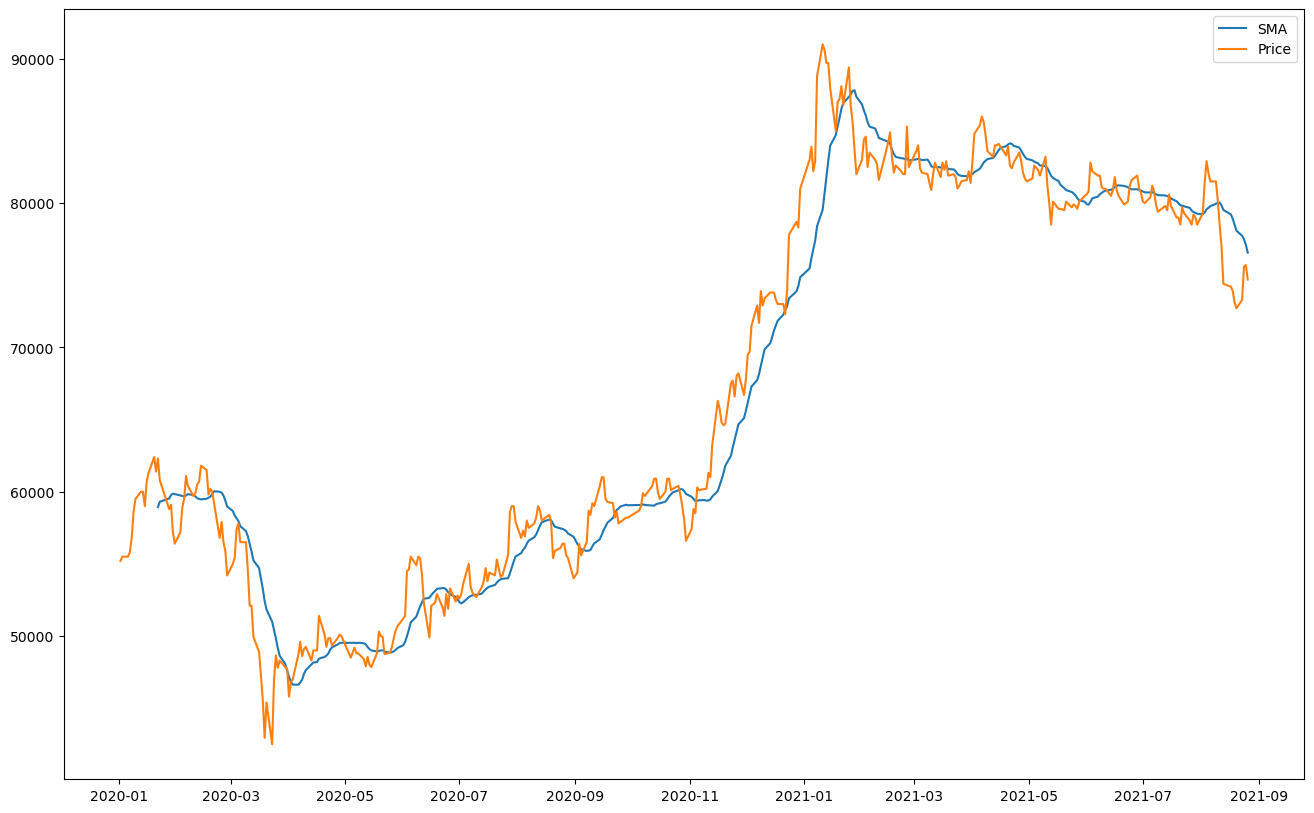

In [9]:
plt.figure(figsize=(16,10))
plt.plot(tsla["Date"], tsla["SMA"], label="SMA")
plt.plot(tsla["Date"], tsla["Close"], label="Price")
plt.legend()
plt.show()

In [10]:
tsla["int"] = tsla["Close"] - tsla["SMA"]

<ipython-input-10-c35dd1f6fe37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla["int"] = tsla["Close"] - tsla["SMA"]


In [11]:
tsla.dropna(inplace=True)
tsla.reset_index(drop=True, inplace=True)

/home/guru/anaconda3/envs/keras/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
l = tsla["int"].tolist()

buys={}
sells={}
position = None
profit = 0

for i in range(len(l)):
    c = l[i]
    p = l[i-1]
    
    current_price = tsla.iloc[i]["Close"]
    
    if c < 0 and p > 0:
        sells.update({i:current_price})
        position="Sell"
        
        if len(buys) > 0:
            last_buy = buys[max(buys.keys())]
            
            print("Entering Price: ", last_buy )
            print("Exit Price: ", current_price)
            print("Position: Buy")
            print("Profit: ", current_price - last_buy)
            print()
            profit += current_price - last_buy
        
    elif c> 0 and p <0:
        buys.update({i:current_price})
        position="Buy"
        
        if len(sells) > 0:
            last_sell = sells[max(sells.keys())]
            
            print("Entering Price: ", last_sell )
            print("Exit Price: ", current_price)
            print("Position: Sell")
            print("Profit: ", last_sell - current_price)
            print()
            profit += last_sell - current_price
            
    if i == len(l) - 1:
        if position == "Buy":
            sells.update({i:current_price})
            last_buy = buys[max(buys.keys())]
            print("Entering Price: ", last_buy )
            print("Exit Price: ", current_price)
            print("Position: Buy")
            print("Profit: ", current_price - last_buy)
            print()
            profit += current_price - last_buy
        
        else:
            buys.update({i:current_price})
            
            last_sell = sells[max(sells.keys())]
            print("Entering Price: ", last_sell )
            print("Exit Price: ", current_price)
            print("Position: Sell")
            print("Profit: ", last_sell - current_price)
            print()
            profit += last_sell - current_price

Entering Price:  62300.0
Exit Price:  58800.0
Position: Buy
Profit:  -3500.0

Entering Price:  58800.0
Exit Price:  61100.0
Position: Sell
Profit:  -2300.0

Entering Price:  61100.0
Exit Price:  59700.0
Position: Buy
Profit:  -1400.0

Entering Price:  59700.0
Exit Price:  59900.0
Position: Sell
Profit:  -200.0

Entering Price:  59900.0
Exit Price:  59200.0
Position: Buy
Profit:  -700.0

Entering Price:  59200.0
Exit Price:  47750.0
Position: Sell
Profit:  11450.0

Entering Price:  47750.0
Exit Price:  45800.0
Position: Buy
Profit:  -1950.0

Entering Price:  45800.0
Exit Price:  47000.0
Position: Sell
Profit:  -1200.0

Entering Price:  47000.0
Exit Price:  48500.0
Position: Buy
Profit:  1500.0

Entering Price:  48500.0
Exit Price:  50300.0
Position: Sell
Profit:  -1800.0

Entering Price:  50300.0
Exit Price:  48750.0
Position: Buy
Profit:  -1550.0

Entering Price:  48750.0
Exit Price:  48850.0
Position: Sell
Profit:  -100.0

Entering Price:  48850.0
Exit Price:  52300.0
Position: Buy
Pr

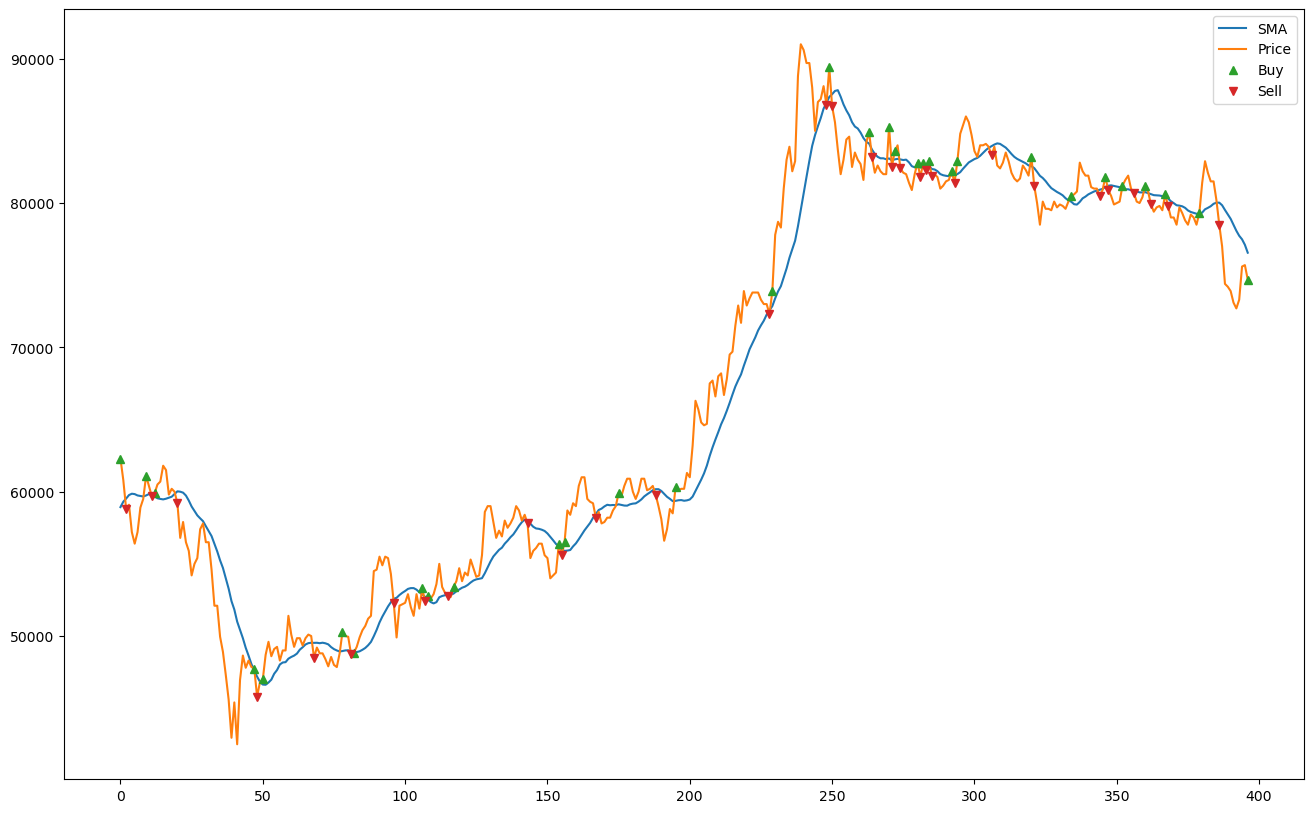

In [13]:
plt.figure(figsize=(16,10))
plt.plot(tsla["SMA"], label="SMA")
plt.plot(tsla["Close"], label="Price")
plt.plot(list(buys.keys()), list(buys.values()), "^", label="Buy")
plt.plot(list(sells.keys()), list(sells.values()), "v", label="Sell")
plt.legend()
plt.show()

In [14]:
# Strategy Profit
profit

2500.0

In [15]:
#Buying one share
tsla.iloc[-1]["Close"] - tsla.iloc[0]["Close"]

12400.0